# 1. Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

(b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set(style="ticks", color_codes=True)

data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])
df['color'] = np.where(df['class']==b'Abnormal', 1, 0)

df.head()



,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,color
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal',1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal',1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal',1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal',1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal',1


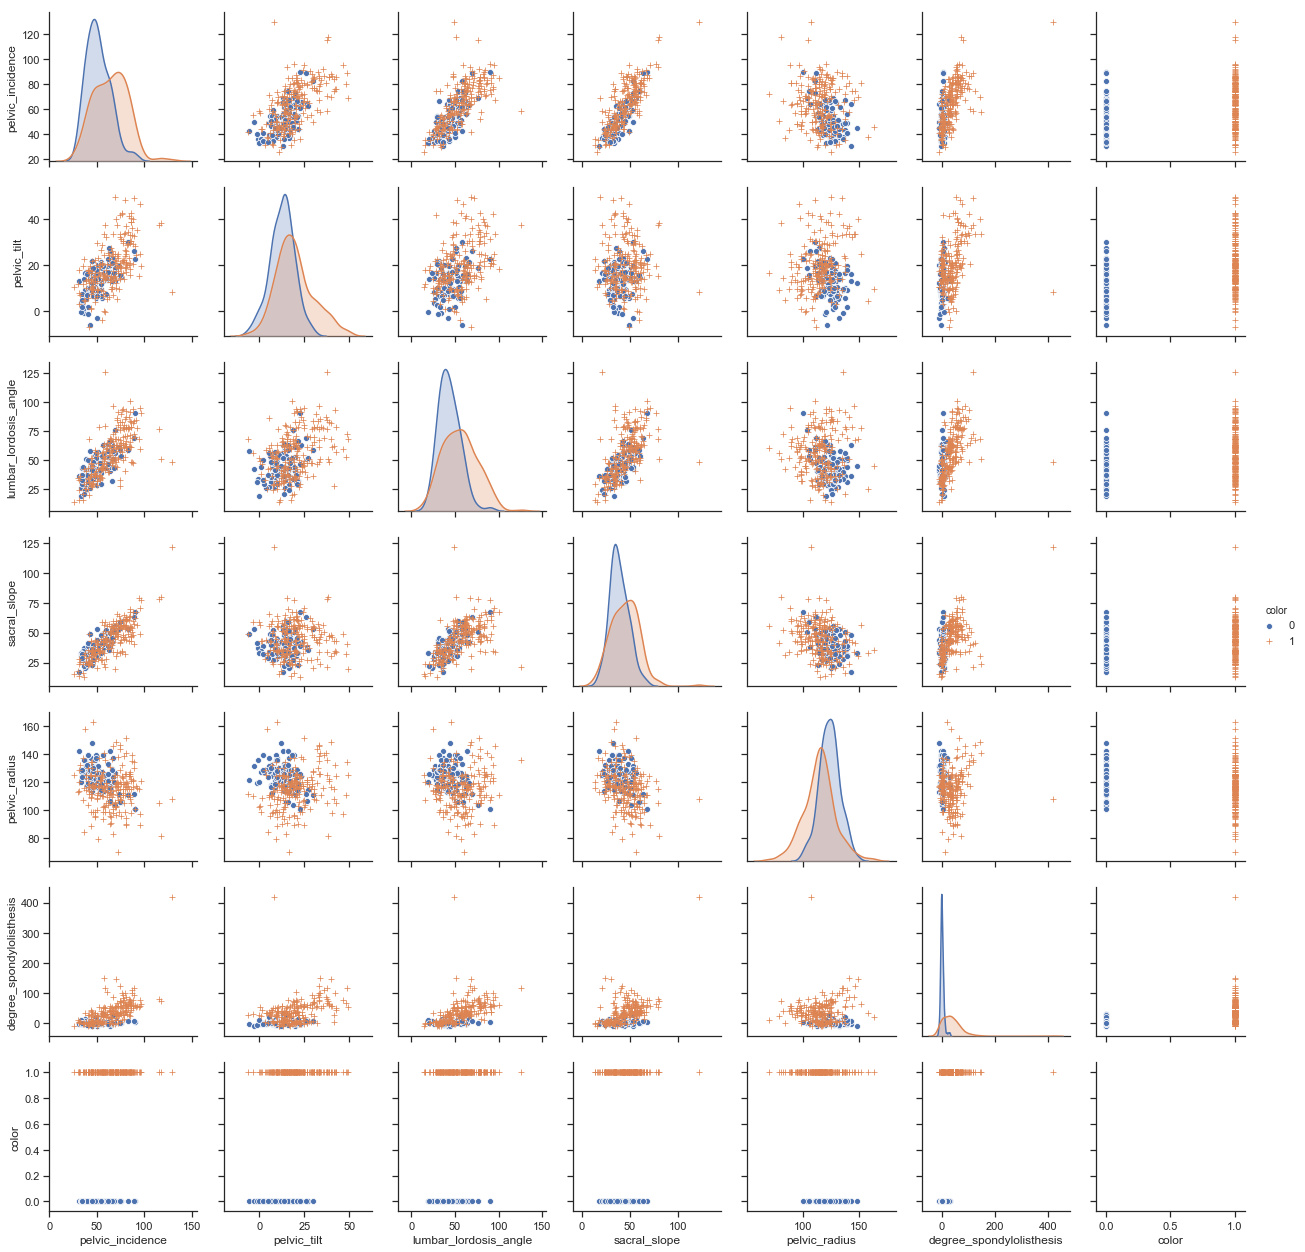

In [5]:
sns.pairplot(df, hue="color",markers=["o", "+"])

plt.show()


ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k∗.1

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,2 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.3 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

Let us further explore some variants of KNN.

(d) Replace the Euclidean metric with the following metrics4 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

C. which becomes Chebyshev Distance with p → ∞

ii. Mahalanobis Distance.

(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

(f) What is the lowest training error rate you achieved in this homework?